## Kaggle Santander Customer Satisfaction Predcition Example

Feature Num.: 370  
Class Label Name: TARGET, 1 mean UNSATISFACTION, 0 mean SATISFACTION  
Model Evaluation: ROC-AUC  
data: https://www.kaggle.com/c/santander-customer-satisfaction/data  

### Preprocessing

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

cust_df = pd.read_csv('./santander-customer-satisfaction/train.csv', encoding='latin-1')
print('Shape of Dataset:', cust_df.shape)
cust_df.head()

Shape of Dataset: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [31]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [32]:
cust_df[cust_df.isna()].count()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [33]:
print(cust_df['TARGET'].value_counts())
unsatis_cnt = cust_df[cust_df.TARGET == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('Ratio of Unsatisfaction:', np.round(unsatis_cnt/total_cnt, 4))

0    73012
1     3008
Name: TARGET, dtype: int64
Ratio of Unsatisfaction: 0.0396


In [34]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [35]:
print(cust_df['var3'].value_counts())
print(cust_df[cust_df.var3 < 0].var3.value_counts())
cust_df['var3'].replace(-999999, 2, inplace=True)

cust_df.drop('ID', axis=1, inplace=True)

X_features = cust_df.iloc[:,:-1]
y_label = cust_df.iloc[:,-1]
print('Shape of Featuer Data:', X_features.shape)

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: var3, Length: 208, dtype: int64
-999999    116
Name: var3, dtype: int64
Shape of Featuer Data: (76020, 369)


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)
print('Shape of Train Data Set: {}, Shape of Test Data Set: {}'.format(X_train.shape, X_test.shape))

y_train_cnt = y_train.count()
train_set_ratio = y_train.value_counts()/y_train_cnt
print('Train label set ratio')
print(train_set_ratio)

y_test_cnt = y_test.count()
test_set_ratio = y_test.value_counts()/y_test_cnt
print('Test label set ratio')
print(test_set_ratio)

Shape of Train Data Set: (60816, 369), Shape of Test Data Set: (15204, 369)
Train label set ratio
0    0.960586
1    0.039414
Name: TARGET, dtype: float64
Test label set ratio
0    0.959813
1    0.040187
Name: TARGET, dtype: float64


### XGBoost Model & Hyperparameter Tuning

In [39]:
#Base line model without hyperparameter tuning

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

XGB = XGBClassifier(n_estimator=500, random_state=156)
evals = [(X_train, y_train),(X_test, y_test)]
XGB.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

pred_proba = XGB.predict_proba(X_test)[:,1]
XGB_roc_auc_score = roc_auc_score(y_test, pred_proba, average='macro')
print('ROC-AUC:', np.round(XGB_roc_auc_score, 4))

c:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:57:55] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.82732	validation_1-auc:0.81133
[1]	validation_0-auc:0.83446	validation_1-auc:0.81705
[2]	validation_0-auc:0.83923	validation_1-auc:0.82181
[3]	validation_0-auc:0.84554	validation_1-auc:0.82318
[4]	validation_0-auc:0.84889	validation_1-auc:0.82685
[5]	validation_0-auc:0.85179	validation_1-auc:0.82808
[6]	validation_0-auc:0.85666	validation_1-auc:0.82915
[7]	validation_0-auc:0.86029	validation_1-auc:0.83161
[8]	validation_0-auc:0.86243	validation_1-auc:0.83074
[9]	validation_0-auc:0.86454	validation_1-auc:0.83146
[10]	validation_0-auc:0.86770	validation_1-auc:0.83390
[11]	validation_0-auc:0.87082	validation_1-

In [44]:
#Hyperparamter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [5,7],
          'min_child_weight': [1,3],
          'colsample_bytree': [0.5,0.75]}

XGB_cv = XGBClassifier(n_estimators=100, random_state=156)
Grid_cv_XGB = GridSearchCV(estimator=XGB_cv, param_grid=params, cv=3)

evals = [(X_train, y_train), (X_test, y_test)]
Grid_cv_XGB.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=evals, verbose=False)

print('GridSearchCV Optimal Params:')
print(Grid_cv_XGB.best_params_)

pred_proba = Grid_cv_XGB.predict_proba(X_test)[:,1]
score = roc_auc_score(y_test, pred_proba, average='macro')
print('ROC AUC:{:.4f}'.format(score))

c:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when con

GridCV Optimal Params:
{'colsample_bytree': 0.5, 'max_depth': 5, 'min_child_weight': 3}
ROC AUC:0.8389


In [45]:
#Using best_params, and add lr=0.02, reg_alpha=0.03
best_XGB = XGBClassifier(n_estimators=1000, random_state=156, max_depth=5, colsample_bytree=0.5, min_child_weight=3, 
                         learning_rate=0.02, reg_alpha=0.03)

best_XGB.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=evals)

pred_proba = best_XGB.predict_proba(X_test)[:,1]
score = roc_auc_score(y_test, pred_proba, average='macro')
print('ROC AUC:{:.4f}'.format(score))

c:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.73723	validation_1-auc:0.71337
[1]	validation_0-auc:0.81272	validation_1-auc:0.79568
[2]	validation_0-auc:0.81184	validation_1-auc:0.79216
[3]	validation_0-auc:0.81638	validation_1-auc:0.79793
[4]	validation_0-auc:0.81216	validation_1-auc:0.79139
[5]	validation_0-auc:0.81960	validation_1-auc:0.79956
[6]	validation_0-auc:0.82308	validation_1-auc:0.80287
[7]	validation_0-auc:0.82694	validation_1-auc:0.80645
[8]	validation_0-auc:0.82771	validation_1-auc:0.80712
[9]	validation_0-auc:0.82536	validation_1-auc:0.80406
[10]	validation_0-auc:0.82871	validation_1-auc:0.80721
[11]	validation_0-auc:0.82576	validation_1-auc:0.80441
[12]	validation_0-auc:0.83015	validation_1-auc:0.80934
[13]	validation_0-auc:0.82798	validation_1-auc:0.80674
[14]	validation_0-auc:0.83110	validation_1-auc:0.80940
[15]	validation_0-auc:0.82969	validation_1-auc:0.80693
[16]	validation_0-auc:0.83138	validation_1-auc:0.80905
[17]	validation_0-auc:0.83013	validation_1-auc:0.80726
[18]	validation_0-au

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

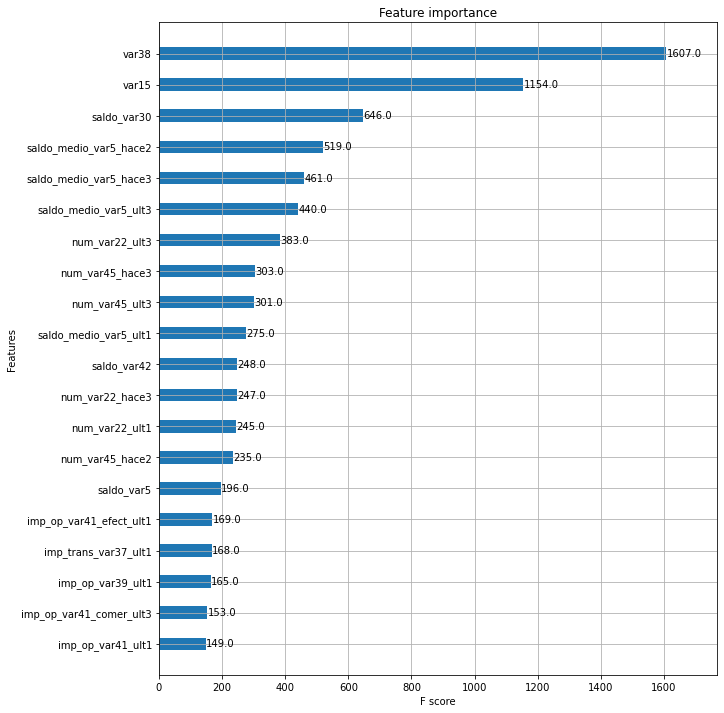

In [46]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(best_XGB, ax=ax, max_num_features=20, height=0.4)

### LightGBM Model & Hyperparameter Tuning

In [51]:
from lightgbm import LGBMClassifier

LGBM = LGBMClassifier(n_estimators=500, random_state=156)

evals2 = [(X_test, y_test)]
LGBM.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals2, verbose=True)

pred_proba = LGBM.predict_proba(X_test)[:,1]
LGBM_roc_auc_score = roc_auc_score(y_test, pred_proba, average='macro')
print('ROC-AUC:', np.round(LGBM_roc_auc_score,4))

[1]	valid_0's auc: 0.813679	valid_0's binary_logloss: 0.160517
[2]	valid_0's auc: 0.816247	valid_0's binary_logloss: 0.155845
[3]	valid_0's auc: 0.821718	valid_0's binary_logloss: 0.152429
[4]	valid_0's auc: 0.82338	valid_0's binary_logloss: 0.149831
[5]	valid_0's auc: 0.825588	valid_0's binary_logloss: 0.147763
[6]	valid_0's auc: 0.827015	valid_0's binary_logloss: 0.146103
[7]	valid_0's auc: 0.829829	valid_0's binary_logloss: 0.144603
[8]	valid_0's auc: 0.830974	valid_0's binary_logloss: 0.143448
[9]	valid_0's auc: 0.831217	valid_0's binary_logloss: 0.142542
[10]	valid_0's auc: 0.832593	valid_0's binary_logloss: 0.141662
[11]	valid_0's auc: 0.833085	valid_0's binary_logloss: 0.140963
[12]	valid_0's auc: 0.833945	valid_0's binary_logloss: 0.140352
[13]	valid_0's auc: 0.834582	valid_0's binary_logloss: 0.139701
[14]	valid_0's auc: 0.83615	valid_0's binary_logloss: 0.139273
[15]	valid_0's auc: 0.837207	valid_0's binary_logloss: 0.138833
[16]	valid_0's auc: 0.83723	valid_0's binary_loglos

In [52]:
params = {'num_leaves': [32,64],
          'max_depth': [128,160],
          'min_child_samples': [60,100]}

LGBM_cv = LGBMClassifier(n_estimators=200)

grid_cv_LGBM = GridSearchCV(estimator=LGBM_cv, param_grid=params, cv=3)

grid_cv_LGBM.fit(X_train, y_train, early_stopping_rounds=50, eval_metric='auc', eval_set=evals2, verbose=0)

print('GridSearchCV Optimal Params:')
print(grid_cv_LGBM.best_params_)

pred_proba = grid_cv_LGBM.predict_proba(X_test)[:,1]
score = roc_auc_score(y_test, pred_proba, average='macro')
print('ROC AUC:{:.4f}'.format(score))

GridSearchCV Optimal Params:
{'max_depth': 128, 'min_child_samples': 60, 'num_leaves': 32}
ROC AUC:0.8402


In [53]:
best_LGBM = LGBMClassifier(n_estimators=1000, max_depth=128, num_leaves=32, min_child_samples=60, 
                           learning_rate=0.02, reg_alpha=0.03)

best_LGBM.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=evals2)

pred_proba = best_LGBM.predict_proba(X_test)[:,1]
score = roc_auc_score(y_test, pred_proba, average='macro')
print('ROC AUC:{:.4f}'.format(score))

[1]	valid_0's auc: 0.817732	valid_0's binary_logloss: 0.166801
[2]	valid_0's auc: 0.818549	valid_0's binary_logloss: 0.16523
[3]	valid_0's auc: 0.819177	valid_0's binary_logloss: 0.163836
[4]	valid_0's auc: 0.818664	valid_0's binary_logloss: 0.162555
[5]	valid_0's auc: 0.819012	valid_0's binary_logloss: 0.161359
[6]	valid_0's auc: 0.819424	valid_0's binary_logloss: 0.160277
[7]	valid_0's auc: 0.821049	valid_0's binary_logloss: 0.15924
[8]	valid_0's auc: 0.820685	valid_0's binary_logloss: 0.158298
[9]	valid_0's auc: 0.82088	valid_0's binary_logloss: 0.157369
[10]	valid_0's auc: 0.821173	valid_0's binary_logloss: 0.156551
[11]	valid_0's auc: 0.82217	valid_0's binary_logloss: 0.15575
[12]	valid_0's auc: 0.824618	valid_0's binary_logloss: 0.155013
[13]	valid_0's auc: 0.825801	valid_0's binary_logloss: 0.154326
[14]	valid_0's auc: 0.827394	valid_0's binary_logloss: 0.153656
[15]	valid_0's auc: 0.827733	valid_0's binary_logloss: 0.152995
[16]	valid_0's auc: 0.828164	valid_0's binary_logloss: